## 환경 설정

In [1]:
from google.colab import drive
drive.mount('/content/drive')

ModuleNotFoundError: No module named 'google'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 
import sys

#경고창이 뜨지 않도록 해주는 것
import warnings
warnings.filterwarnings('ignore')

# notebook을 실행한 브라우저에서 바로 그림을 볼 수 있게 해주는 것
%matplotlib inline 

**주피터 노트북에서 시각화할때, matplotlib가 한글 폰트 지원하지 않아, 깨짐 처리해줘야 함**

In [3]:
import platform                

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus']= False

if platform.system() == 'Darwin': #맥os 사용자의 경우에
    plt.style.use('seaborn-darkgrid') 
    rc('font', family = 'AppleGothic')
    
elif platform.system() == 'Windows':#윈도우 사용자의 경우에
    path = 'c:/Windows/Fonts/malgun.ttf'
    font_name = font_manager.FontProperties(fname=path).get_name()
    plt.style.use('seaborn-darkgrid') # https://python-graph-gallery.com/199-matplotlib-style-sheets/
    rc('font', family=font_name)

# 데이터 불러오기 

In [4]:
 df = pd.read_csv('NYC_taxi_extra_info.csv') #파일경로 각자 알맞게 지정해주세요 

In [5]:
df['pickup_hour'] = pd.to_datetime(df['pickup_hour'])
df['zip_code'] = df['zip_code'].astype(str)
df.loc[(df.day ==1), 'is_weekend'] = 1
df.loc[(df.day ==19), 'is_weekend'] = 1       # 승규님이 말씀하신 공휴일

 
df.head()  # weekday (0:월 ~ 6:일)

,zip_code,pickup_hour,month,day,weekday,hour,is_weekend,cnt,lat,lon,...,wind_direction,wind_speed,des,wind_x,wind_y,is_raining,is_snowing,is_cloudy,is_clear,weather_strength
0,11106,2015-01-01,1,1,3,0,1,75,40.761229,-73.929593,...,249.0,2.0,sky_is_clear,-0.358368,-0.93358,0,0,0,1,0
1,10006,2015-01-01,1,1,3,0,1,64,40.708312,-74.013440,...,249.0,2.0,sky_is_clear,-0.358368,-0.93358,0,0,0,1,0
2,11201,2015-01-01,1,1,3,0,1,169,40.692500,-73.991763,...,249.0,2.0,sky_is_clear,-0.358368,-0.93358,0,0,0,1,0
3,11430,2015-01-01,1,1,3,0,1,222,40.653199,-73.784133,...,249.0,2.0,sky_is_clear,-0.358368,-0.93358,0,0,0,1,0
4,10032,2015-01-01,1,1,3,0,1,64,40.837391,-73.941015,...,249.0,2.0,sky_is_clear,-0.358368,-0.93358,0,0,0,1,0


# EDA 개요
### 1) 데이터 파악 및 이상유무 확인 
- 기본적인 통계량과 분포 확인
- 어떤 데이터인가?  
- 결측치, 이상치는 없는가? 

### 2) 인사이트 도출 
- 다양한 각도에서 데이터를 분석&시각화 
- 분석결과를 해석해보기, 왜 그럴까?
- 해석결과 활용방안 생각해보기, 어떻게 활용할 수 있을까?

 - ex) 1월 수요변화추이, 시간대별/요일별 트렌드, 가장 수요가 많은 지역은? 
 - ex) 추세선 그리기, 그룹별 막대그래프 찍어보기, 2가지 축으로 히트맵 그려보기 



In [6]:
df.info()  # 결측치 없음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87020 entries, 0 to 87019
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   zip_code          87020 non-null  object        
 1   pickup_hour       87020 non-null  datetime64[ns]
 2   month             87020 non-null  int64         
 3   day               87020 non-null  int64         
 4   weekday           87020 non-null  int64         
 5   hour              87020 non-null  int64         
 6   is_weekend        87020 non-null  int64         
 7   cnt               87020 non-null  int64         
 8   lat               87020 non-null  float64       
 9   lon               87020 non-null  float64       
 10  temp              87020 non-null  float64       
 11  humid             87020 non-null  float64       
 12  pressure          87020 non-null  float64       
 13  wind_direction    87020 non-null  float64       
 14  wind_speed        8702

In [7]:
df.describe(include='all')

,zip_code,pickup_hour,month,day,weekday,hour,is_weekend,cnt,lat,lon,...,wind_direction,wind_speed,des,wind_x,wind_y,is_raining,is_snowing,is_cloudy,is_clear,weather_strength
count,87020,87020,87020.0,87020.000000,87020.000000,87020.000000,87020.000000,87020.000000,87020.000000,87020.000000,...,87020.000000,87020.000000,87020,87020.000000,87020.000000,87020.000000,87020.000000,87020.000000,87020.000000,87020.000000
unique,374,744,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,10019,2015-01-01 03:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,sky_is_clear,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,744,171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,42241,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2015-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2015-01-31 23:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,1.0,15.871685,3.169593,11.580648,0.373293,141.603080,40.745009,-73.943340,...,231.813123,2.293254,NaN,0.146573,-0.478725,0.084130,0.024190,0.406263,0.485417,1.798793
std,NaN,NaN,0.0,8.951484,1.936788,6.973099,0.483682,306.902683,0.062141,0.072414,...,97.681741,1.200096,NaN,0.638024,0.585041,0.277584,0.153639,0.491138,0.499790,2.272914
min,NaN,NaN,1.0,1.000000,0.000000,0.000000,0.000000,1.000000,40.534688,-78.955143,...,0.000000,0.000000,NaN,-1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,1.0,8.000000,2.000000,6.000000,0.000000,2.000000,40.712369,-73.983851,...,203.000000,1.000000,NaN,-0.325568,-0.965926,0.000000,0.000000,0.000000,0.000000,0.000000


# 공통질문 

### 1월 한 달간 수요추이
- 급격한 변화가 있었던 특정 날짜의 시간을 찾아보세요. 
- 왜 그랬을까요? 그 이유도 함께 추론해주세요. 


In [8]:
# 1월 수요변화 추이
grouped = df.groupby(['pickup_hour'])
print(grouped)

In [9]:
for key, group in grouped:
    print(key , len(group)) # 각 시간당 data 개수
    print(group.head())
    print( )

2015-01-01 00:00:00 149
  zip_code pickup_hour  month  day  weekday  hour  is_weekend  cnt        lat  \
0    11106  2015-01-01      1    1        3     0           1   75  40.761229   
1    10006  2015-01-01      1    1        3     0           1   64  40.708312   
2    11201  2015-01-01      1    1        3     0           1  169  40.692500   
3    11430  2015-01-01      1    1        3     0           1  222  40.653199   
4    10032  2015-01-01      1    1        3     0           1   64  40.837391   

         lon  ...  wind_direction  wind_speed           des    wind_x  \
0 -73.929593  ...           249.0         2.0  sky_is_clear -0.358368   
1 -74.013440  ...           249.0         2.0  sky_is_clear -0.358368   
2 -73.991763  ...           249.0         2.0  sky_is_clear -0.358368   
3 -73.784133  ...           249.0         2.0  sky_is_clear -0.358368   
4 -73.941015  ...           249.0         2.0  sky_is_clear -0.358368   

    wind_y is_raining  is_snowing  is_cloudy  is_c

     zip_code         pickup_hour  month  day  weekday  hour  is_weekend  cnt  \
2374    10006 2015-01-01 17:00:00      1    1        3    17           1   97   
2375    11430 2015-01-01 17:00:00      1    1        3    17           1  424   
2376    11206 2015-01-01 17:00:00      1    1        3    17           1    8   
2377    11237 2015-01-01 17:00:00      1    1        3    17           1    3   
2378    11230 2015-01-01 17:00:00      1    1        3    17           1    2   

            lat        lon  ...  wind_direction  wind_speed           des  \
2374  40.708312 -74.013440  ...           240.0         5.0  sky_is_clear   
2375  40.653199 -73.784133  ...           240.0         5.0  sky_is_clear   
2376  40.701645 -73.943105  ...           240.0         5.0  sky_is_clear   
2377  40.701298 -73.918203  ...           240.0         5.0  sky_is_clear   
2378  40.621524 -73.965614  ...           240.0         5.0  sky_is_clear   

      wind_x    wind_y is_raining  is_snowing  is_

     zip_code         pickup_hour  month  day  weekday  hour  is_weekend  cnt  \
5830    10103 2015-01-02 23:00:00      1    2        4    23           0   19   
5831    10075 2015-01-02 23:00:00      1    2        4    23           0  215   
5832    11102 2015-01-02 23:00:00      1    2        4    23           0   14   
5833    10025 2015-01-02 23:00:00      1    2        4    23           0  296   
5834    11371 2015-01-02 23:00:00      1    2        4    23           0  485   

            lat        lon  ...  wind_direction  wind_speed           des  \
5830  40.760277 -73.976285  ...           267.0         3.0  sky_is_clear   
5831  40.773597 -73.956517  ...           267.0         3.0  sky_is_clear   
5832  40.771036 -73.924682  ...           267.0         3.0  sky_is_clear   
5833  40.796283 -73.969972  ...           267.0         3.0  sky_is_clear   
5834  40.773995 -73.880000  ...           267.0         3.0  sky_is_clear   

        wind_x   wind_y is_raining  is_snowing  is

     zip_code         pickup_hour  month  day  weekday  hour  is_weekend  cnt  \
9050    11373 2015-01-04 02:00:00      1    4        6     2           1   17   
9051    10030 2015-01-04 02:00:00      1    4        6     2           1    6   
9052    10174 2015-01-04 02:00:00      1    4        6     2           1    6   
9053    10019 2015-01-04 02:00:00      1    4        6     2           1  659   
9054    10026 2015-01-04 02:00:00      1    4        6     2           1   33   

            lat        lon  ...  wind_direction  wind_speed            des  \
9050  40.739766 -73.878525  ...           126.0         2.0  moderate_rain   
9051  40.818065 -73.943105  ...           126.0         2.0  moderate_rain   
9052  40.751347 -73.975136  ...           126.0         2.0  moderate_rain   
9053  40.763992 -73.985893  ...           126.0         2.0  moderate_rain   
9054  40.803045 -73.952793  ...           126.0         2.0  moderate_rain   

        wind_x    wind_y is_raining  is_snow

      zip_code         pickup_hour  month  day  weekday  hour  is_weekend  \
12386    10031 2015-01-05 07:00:00      1    5        0     7           0   
12387    10030 2015-01-05 07:00:00      1    5        0     7           0   
12388    10006 2015-01-05 07:00:00      1    5        0     7           0   
12389    10065 2015-01-05 07:00:00      1    5        0     7           0   
12390    10014 2015-01-05 07:00:00      1    5        0     7           0   

       cnt        lat        lon  ...  wind_direction  wind_speed  \
12386   54  40.825310 -73.948360  ...           252.0         3.0   
12387   28  40.818065 -73.943105  ...           252.0         3.0   
12388   16  40.708312 -74.013440  ...           252.0         3.0   
12389  780  40.766073 -73.964662  ...           252.0         3.0   
12390  453  40.734090 -74.004893  ...           252.0         3.0   

                des    wind_x    wind_y is_raining  is_snowing  is_cloudy  \
12386  sky_is_clear -0.309017 -0.951057      

      zip_code         pickup_hour  month  day  weekday  hour  is_weekend  \
15796    10169 2015-01-06 13:00:00      1    6        1    13           0   
15797    10026 2015-01-06 13:00:00      1    6        1    13           0   
15798    10023 2015-01-06 13:00:00      1    6        1    13           0   
15799    10037 2015-01-06 13:00:00      1    6        1    13           0   
15800    11205 2015-01-06 13:00:00      1    6        1    13           0   

       cnt        lat        lon  ...  wind_direction  wind_speed  \
15796    8  40.754515 -73.975835  ...           240.0         1.0   
15797   17  40.803045 -73.952793  ...           240.0         1.0   
15798  646  40.776973 -73.981065  ...           240.0         1.0   
15799    4  40.800988 -73.946202  ...           240.0         1.0   
15800    4  40.693085 -73.964395  ...           240.0         1.0   

                 des  wind_x    wind_y is_raining  is_snowing  is_cloudy  \
15796  broken_clouds    -0.5 -0.866025        

[5 rows x 23 columns]

2015-01-07 17:00:00 116
      zip_code         pickup_hour  month  day  weekday  hour  is_weekend  \
18974    10174 2015-01-07 17:00:00      1    7        2    17           0   
18975    10005 2015-01-07 17:00:00      1    7        2    17           0   
18976    10280 2015-01-07 17:00:00      1    7        2    17           0   
18977    10069 2015-01-07 17:00:00      1    7        2    17           0   
18978    10019 2015-01-07 17:00:00      1    7        2    17           0   

        cnt        lat        lon  ...  wind_direction  wind_speed  \
18974    35  40.751347 -73.975136  ...           282.0         6.0   
18975   107  40.720452 -74.006706  ...           282.0         6.0   
18976    80  40.707994 -74.017197  ...           282.0         6.0   
18977    59  40.776940 -73.988253  ...           282.0         6.0   
18978  1576  40.763992 -73.985893  ...           282.0         6.0   

                des    wind_x    wind_y is_raining  is_snowing  is_cl

      zip_code         pickup_hour  month  day  weekday  hour  is_weekend  \
22096    10171 2015-01-08 20:00:00      1    8        3    20           0   
22097    10014 2015-01-08 20:00:00      1    8        3    20           0   
22098    10280 2015-01-08 20:00:00      1    8        3    20           0   
22099    10119 2015-01-08 20:00:00      1    8        3    20           0   
22100    10018 2015-01-08 20:00:00      1    8        3    20           0   

        cnt        lat        lon  ...  wind_direction  wind_speed  \
22096    29  40.756202 -73.974574  ...           270.0         1.0   
22097  1002  40.734090 -74.004893  ...           270.0         1.0   
22098    82  40.707994 -74.017197  ...           270.0         1.0   
22099   196  40.750530 -73.993090  ...           270.0         1.0   
22100   695  40.754037 -73.990464  ...           270.0         1.0   

                des        wind_x  wind_y is_raining  is_snowing  is_cloudy  \
22096  sky_is_clear -1.836970e-16    

      zip_code         pickup_hour  month  day  weekday  hour  is_weekend  \
25586    10280 2015-01-10 01:00:00      1   10        5     1           1   
25587    11205 2015-01-10 01:00:00      1   10        5     1           1   
25588    10038 2015-01-10 01:00:00      1   10        5     1           1   
25589    10029 2015-01-10 01:00:00      1   10        5     1           1   
25590    10028 2015-01-10 01:00:00      1   10        5     1           1   

       cnt        lat        lon  ...  wind_direction  wind_speed  \
25586   27  40.707994 -74.017197  ...           269.0         3.0   
25587   46  40.693085 -73.964395  ...           269.0         3.0   
25588   90  40.709228 -74.004282  ...           269.0         3.0   
25589   84  40.792048 -73.944442  ...           269.0         3.0   
25590  367  40.776539 -73.953739  ...           269.0         3.0   

                des    wind_x    wind_y is_raining  is_snowing  is_cloudy  \
25586  sky_is_clear -0.017452 -0.999848      

[5 rows x 23 columns]

2015-01-11 09:00:00 121
      zip_code         pickup_hour  month  day  weekday  hour  is_weekend  \
29549    10171 2015-01-11 09:00:00      1   11        6     9           1   
29550    11215 2015-01-11 09:00:00      1   11        6     9           1   
29551    11106 2015-01-11 09:00:00      1   11        6     9           1   
29552    10031 2015-01-11 09:00:00      1   11        6     9           1   
29553    11430 2015-01-11 09:00:00      1   11        6     9           1   

       cnt        lat        lon  ...  wind_direction  wind_speed  \
29549   19  40.756202 -73.974574  ...           265.0         1.0   
29550   15  40.667301 -73.983851  ...           265.0         1.0   
29551   58  40.761229 -73.929593  ...           265.0         1.0   
29552   29  40.825310 -73.948360  ...           265.0         1.0   
29553  195  40.653199 -73.784133  ...           265.0         1.0   

                 des    wind_x    wind_y is_raining  is_snowing  is_cloudy 

      zip_code         pickup_hour  month  day  weekday  hour  is_weekend  \
32829    10014 2015-01-12 13:00:00      1   12        0    13           0   
32830    10119 2015-01-12 13:00:00      1   12        0    13           0   
32831    10103 2015-01-12 13:00:00      1   12        0    13           0   
32832    10172 2015-01-12 13:00:00      1   12        0    13           0   
32833    10111 2015-01-12 13:00:00      1   12        0    13           0   

       cnt        lat        lon  ...  wind_direction  wind_speed  \
32829  399  40.734090 -74.004893  ...           222.0         1.0   
32830  370  40.750530 -73.993090  ...           222.0         1.0   
32831   52  40.760277 -73.976285  ...           222.0         1.0   
32832   14  40.755575 -73.975030  ...           222.0         1.0   
32833   13  40.759220 -73.977836  ...           222.0         1.0   

                   des    wind_x    wind_y is_raining  is_snowing  is_cloudy  \
32829  overcast_clouds -0.743145 -0.669131

      zip_code         pickup_hour  month  day  weekday  hour  is_weekend  \
35910    10038 2015-01-13 16:00:00      1   13        1    16           0   
35911    10018 2015-01-13 16:00:00      1   13        1    16           0   
35912    10025 2015-01-13 16:00:00      1   13        1    16           0   
35913    11436 2015-01-13 16:00:00      1   13        1    16           0   
35914    11377 2015-01-13 16:00:00      1   13        1    16           0   

       cnt        lat        lon  ...  wind_direction  wind_speed  \
35910   82  40.709228 -74.004282  ...             0.0         0.0   
35911  639  40.754037 -73.990464  ...             0.0         0.0   
35912  529  40.796283 -73.969972  ...             0.0         0.0   
35913    4  40.676615 -73.796218  ...             0.0         0.0   
35914   12  40.744809 -73.904360  ...             0.0         0.0   

                des  wind_x  wind_y is_raining  is_snowing  is_cloudy  \
35910  sky_is_clear     1.0     0.0          0   

      zip_code         pickup_hour  month  day  weekday  hour  is_weekend  \
39748    11101 2015-01-15 01:00:00      1   15        3     1           0   
39749    11430 2015-01-15 01:00:00      1   15        3     1           0   
39750    10075 2015-01-15 01:00:00      1   15        3     1           0   
39751    10025 2015-01-15 01:00:00      1   15        3     1           0   
39752    11373 2015-01-15 01:00:00      1   15        3     1           0   

       cnt        lat        lon  ...  wind_direction  wind_speed  \
39748   56  40.748484 -73.938832  ...             4.0         1.0   
39749   93  40.653199 -73.784133  ...             4.0         1.0   
39750   47  40.773597 -73.956517  ...             4.0         1.0   
39751   88  40.796283 -73.969972  ...             4.0         1.0   
39752   11  40.739766 -73.878525  ...             4.0         1.0   

                 des    wind_x    wind_y is_raining  is_snowing  is_cloudy  \
39748  broken_clouds  0.997564  0.069756    

2015-01-16 06:00:00 119
      zip_code         pickup_hour  month  day  weekday  hour  is_weekend  \
43123    10037 2015-01-16 06:00:00      1   16        4     6           0   
43124    10019 2015-01-16 06:00:00      1   16        4     6           0   
43125    11238 2015-01-16 06:00:00      1   16        4     6           0   
43126    10171 2015-01-16 06:00:00      1   16        4     6           0   
43127    10172 2015-01-16 06:00:00      1   16        4     6           0   

       cnt        lat        lon  ...  wind_direction  wind_speed  \
43123   12  40.800988 -73.946202  ...           252.0         2.0   
43124  467  40.763992 -73.985893  ...           252.0         2.0   
43125    7  40.681044 -73.963612  ...           252.0         2.0   
43126    4  40.756202 -73.974574  ...           252.0         2.0   
43127    5  40.755575 -73.975030  ...           252.0         2.0   

                des    wind_x    wind_y is_raining  is_snowing  is_cloudy  \
43123  sky_is_clear -

      zip_code         pickup_hour  month  day  weekday  hour  is_weekend  \
46470    11201 2015-01-17 09:00:00      1   17        5     9           1   
46471    10065 2015-01-17 09:00:00      1   17        5     9           1   
46472    11430 2015-01-17 09:00:00      1   17        5     9           1   
46473    10174 2015-01-17 09:00:00      1   17        5     9           1   
46474    10280 2015-01-17 09:00:00      1   17        5     9           1   

       cnt        lat        lon  ...  wind_direction  wind_speed  \
46470   88  40.692500 -73.991763  ...           309.0         2.0   
46471  568  40.766073 -73.964662  ...           309.0         2.0   
46472  155  40.653199 -73.784133  ...           309.0         2.0   
46473   19  40.751347 -73.975136  ...           309.0         2.0   
46474   93  40.707994 -74.017197  ...           309.0         2.0   

                des   wind_x    wind_y is_raining  is_snowing  is_cloudy  \
46470  sky_is_clear  0.62932 -0.777146        

      zip_code         pickup_hour  month  day  weekday  hour  is_weekend  \
49747    10171 2015-01-18 11:00:00      1   18        6    11           1   
49748    11430 2015-01-18 11:00:00      1   18        6    11           1   
49749    10005 2015-01-18 11:00:00      1   18        6    11           1   
49750    11221 2015-01-18 11:00:00      1   18        6    11           1   
49751    10280 2015-01-18 11:00:00      1   18        6    11           1   

       cnt        lat        lon  ...  wind_direction  wind_speed  \
49747   43  40.756202 -73.974574  ...           200.0         1.0   
49748  207  40.653199 -73.784133  ...           200.0         1.0   
49749   88  40.720452 -74.006706  ...           200.0         1.0   
49750    6  40.690901 -73.928318  ...           200.0         1.0   
49751   98  40.707994 -74.017197  ...           200.0         1.0   

                   des    wind_x   wind_y is_raining  is_snowing  is_cloudy  \
49747  overcast_clouds -0.939693 -0.34202  

      zip_code         pickup_hour  month  day  weekday  hour  is_weekend  \
52697    10035 2015-01-19 12:00:00      1   19        0    12           1   
52698    10165 2015-01-19 12:00:00      1   19        0    12           1   
52699    11217 2015-01-19 12:00:00      1   19        0    12           1   
52700    10031 2015-01-19 12:00:00      1   19        0    12           1   
52701    10002 2015-01-19 12:00:00      1   19        0    12           1   

       cnt        lat        lon  ...  wind_direction  wind_speed  \
52697   33  40.796804 -73.939937  ...           275.0         3.0   
52698   70  40.752303 -73.978431  ...           275.0         3.0   
52699   23  40.682279 -73.979094  ...           275.0         3.0   
52700   16  40.825310 -73.948360  ...           275.0         3.0   
52701  217  40.717057 -73.989329  ...           275.0         3.0   

                des    wind_x    wind_y is_raining  is_snowing  is_cloudy  \
52697  sky_is_clear  0.087156 -0.996195      

[5 rows x 23 columns]

2015-01-20 19:00:00 107
      zip_code         pickup_hour  month  day  weekday  hour  is_weekend  \
56220    10065 2015-01-20 19:00:00      1   20        1    19           0   
56221    11430 2015-01-20 19:00:00      1   20        1    19           0   
56222    10024 2015-01-20 19:00:00      1   20        1    19           0   
56223    10280 2015-01-20 19:00:00      1   20        1    19           0   
56224    10019 2015-01-20 19:00:00      1   20        1    19           0   

        cnt        lat        lon  ...  wind_direction  wind_speed  \
56220   976  40.766073 -73.964662  ...           271.0         2.0   
56221   510  40.653199 -73.784133  ...           271.0         2.0   
56222   688  40.786271 -73.975631  ...           271.0         2.0   
56223    90  40.707994 -74.017197  ...           271.0         2.0   
56224  1962  40.763992 -73.985893  ...           271.0         2.0   

              des    wind_x    wind_y is_raining  is_snowing  is_clou

[5 rows x 23 columns]

2015-01-21 19:00:00 119
      zip_code         pickup_hour  month  day  weekday  hour  is_weekend  \
58926    11201 2015-01-21 19:00:00      1   21        2    19           0   
58927    10069 2015-01-21 19:00:00      1   21        2    19           0   
58928    10165 2015-01-21 19:00:00      1   21        2    19           0   
58929    10031 2015-01-21 19:00:00      1   21        2    19           0   
58930    10013 2015-01-21 19:00:00      1   21        2    19           0   

       cnt        lat        lon  ...  wind_direction  wind_speed  \
58926  105  40.692500 -73.991763  ...            60.0         1.0   
58927   49  40.776940 -73.988253  ...            60.0         1.0   
58928   50  40.752303 -73.978431  ...            60.0         1.0   
58929   21  40.825310 -73.948360  ...            60.0         1.0   
58930  730  40.723075 -74.009359  ...            60.0         1.0   

                    des  wind_x    wind_y is_raining  is_snowing  is_cloudy

      zip_code         pickup_hour  month  day  weekday  hour  is_weekend  \
61432    10111 2015-01-22 17:00:00      1   22        3    17           0   
61433    11373 2015-01-22 17:00:00      1   22        3    17           0   
61434    10069 2015-01-22 17:00:00      1   22        3    17           0   
61435    11371 2015-01-22 17:00:00      1   22        3    17           0   
61436    10028 2015-01-22 17:00:00      1   22        3    17           0   

       cnt        lat        lon  ...  wind_direction  wind_speed  \
61432   14  40.759220 -73.977836  ...           304.0         1.0   
61433    1  40.739766 -73.878525  ...           304.0         1.0   
61434   38  40.776940 -73.988253  ...           304.0         1.0   
61435  655  40.773995 -73.880000  ...           304.0         1.0   
61436  738  40.776539 -73.953739  ...           304.0         1.0   

                    des    wind_x    wind_y is_raining  is_snowing  is_cloudy  \
61432  scattered_clouds  0.559193 -0.8290

      zip_code         pickup_hour  month  day  weekday  hour  is_weekend  \
64597    10171 2015-01-23 20:00:00      1   23        4    20           0   
64598    10031 2015-01-23 20:00:00      1   23        4    20           0   
64599    11101 2015-01-23 20:00:00      1   23        4    20           0   
64600    10039 2015-01-23 20:00:00      1   23        4    20           0   
64601    10153 2015-01-23 20:00:00      1   23        4    20           0   

       cnt        lat        lon  ...  wind_direction  wind_speed  \
64597   41  40.756202 -73.974574  ...           220.0         2.0   
64598   30  40.825310 -73.948360  ...           220.0         2.0   
64599   54  40.748484 -73.938832  ...           220.0         2.0   
64600    2  40.823746 -73.939666  ...           220.0         2.0   
64601   24  40.763541 -73.972212  ...           220.0         2.0   

                des    wind_x    wind_y is_raining  is_snowing  is_cloudy  \
64597  sky_is_clear -0.766044 -0.642788      

[5 rows x 23 columns]

2015-01-24 22:00:00 127
      zip_code         pickup_hour  month  day  weekday  hour  is_weekend  \
67801    10279 2015-01-24 22:00:00      1   24        5    22           1   
67802    10171 2015-01-24 22:00:00      1   24        5    22           1   
67803    10174 2015-01-24 22:00:00      1   24        5    22           1   
67804    10014 2015-01-24 22:00:00      1   24        5    22           1   
67805    10005 2015-01-24 22:00:00      1   24        5    22           1   

        cnt        lat        lon  ...  wind_direction  wind_speed  \
67801     3  40.712369 -74.008401  ...           315.0         2.0   
67802    11  40.756202 -73.974574  ...           315.0         2.0   
67803    18  40.751347 -73.975136  ...           315.0         2.0   
67804  1393  40.734090 -74.004893  ...           315.0         2.0   
67805    86  40.720452 -74.006706  ...           315.0         2.0   

              des    wind_x    wind_y is_raining  is_snowing  is_clou

[5 rows x 23 columns]

2015-01-25 22:00:00 121
      zip_code         pickup_hour  month  day  weekday  hour  is_weekend  \
70732    10018 2015-01-25 22:00:00      1   25        6    22           1   
70733    10069 2015-01-25 22:00:00      1   25        6    22           1   
70734    10165 2015-01-25 22:00:00      1   25        6    22           1   
70735    10019 2015-01-25 22:00:00      1   25        6    22           1   
70736    10167 2015-01-25 22:00:00      1   25        6    22           1   

       cnt        lat        lon  ...  wind_direction  wind_speed         des  \
70732  298  40.754037 -73.990464  ...           309.0         2.0  few_clouds   
70733   14  40.776940 -73.988253  ...           309.0         2.0  few_clouds   
70734   33  40.752303 -73.978431  ...           309.0         2.0  few_clouds   
70735  741  40.763992 -73.985893  ...           309.0         2.0  few_clouds   
70736    4  40.754649 -73.974771  ...           309.0         2.0  few_clouds   

   

      zip_code         pickup_hour  month  day  weekday  hour  is_weekend  \
73744    10028 2015-01-27 03:00:00      1   27        1     3           0   
73745    10004 2015-01-27 03:00:00      1   27        1     3           0   
73746    10019 2015-01-27 03:00:00      1   27        1     3           0   
73747    10065 2015-01-27 03:00:00      1   27        1     3           0   
73748    10012 2015-01-27 03:00:00      1   27        1     3           0   

       cnt        lat        lon  ...  wind_direction  wind_speed   des  \
73744    1  40.776539 -73.953739  ...            29.0         6.0  snow   
73745    1  40.700628 -74.014018  ...            29.0         6.0  snow   
73746    1  40.763992 -73.985893  ...            29.0         6.0  snow   
73747    1  40.766073 -73.964662  ...            29.0         6.0  snow   
73748    2  40.725063 -73.998065  ...            29.0         6.0  snow   

        wind_x   wind_y is_raining  is_snowing  is_cloudy  is_clear  \
73744  0.87462 

[5 rows x 23 columns]

2015-01-28 06:00:00 124
      zip_code         pickup_hour  month  day  weekday  hour  is_weekend  \
76257    10174 2015-01-28 06:00:00      1   28        2     6           0   
76258    10279 2015-01-28 06:00:00      1   28        2     6           0   
76259    11435 2015-01-28 06:00:00      1   28        2     6           0   
76260    10018 2015-01-28 06:00:00      1   28        2     6           0   
76261    10075 2015-01-28 06:00:00      1   28        2     6           0   

       cnt        lat        lon  ...  wind_direction  wind_speed         des  \
76257   17  40.751347 -73.975136  ...           330.0         2.0  few_clouds   
76258    4  40.712369 -74.008401  ...           330.0         2.0  few_clouds   
76259    4  40.699612 -73.808415  ...           330.0         2.0  few_clouds   
76260  551  40.754037 -73.990464  ...           330.0         2.0  few_clouds   
76261  273  40.773597 -73.956517  ...           330.0         2.0  few_clouds   

   

      zip_code         pickup_hour  month  day  weekday  hour  is_weekend  \
80782    11201 2015-01-29 21:00:00      1   29        3    21           0   
80783    11106 2015-01-29 21:00:00      1   29        3    21           0   
80784    10019 2015-01-29 21:00:00      1   29        3    21           0   
80785    11221 2015-01-29 21:00:00      1   29        3    21           0   
80786    10004 2015-01-29 21:00:00      1   29        3    21           0   

        cnt        lat        lon  ...  wind_direction  wind_speed  \
80782   116  40.692500 -73.991763  ...           144.0         1.0   
80783    14  40.761229 -73.929593  ...           144.0         1.0   
80784  1836  40.763992 -73.985893  ...           144.0         1.0   
80785     5  40.690901 -73.928318  ...           144.0         1.0   
80786   174  40.700628 -74.014018  ...           144.0         1.0   

                   des    wind_x    wind_y is_raining  is_snowing  is_cloudy  \
80782  overcast_clouds -0.809017  0.

[5 rows x 23 columns]

2015-01-31 06:00:00 114
      zip_code         pickup_hour  month  day  weekday  hour  is_weekend  \
84857    11434 2015-01-31 06:00:00      1   31        5     6           1   
84858    11430 2015-01-31 06:00:00      1   31        5     6           1   
84859    10018 2015-01-31 06:00:00      1   31        5     6           1   
84860    10119 2015-01-31 06:00:00      1   31        5     6           1   
84861    11231 2015-01-31 06:00:00      1   31        5     6           1   

       cnt        lat        lon  ...  wind_direction  wind_speed  \
84857    2  40.677314 -73.779485  ...           321.0         5.0   
84858  253  40.653199 -73.784133  ...           321.0         5.0   
84859  157  40.754037 -73.990464  ...           321.0         5.0   
84860   91  40.750530 -73.993090  ...           321.0         5.0   
84861   14  40.680265 -74.000159  ...           321.0         5.0   

                des    wind_x   wind_y is_raining  is_snowing  is_cloudy  \

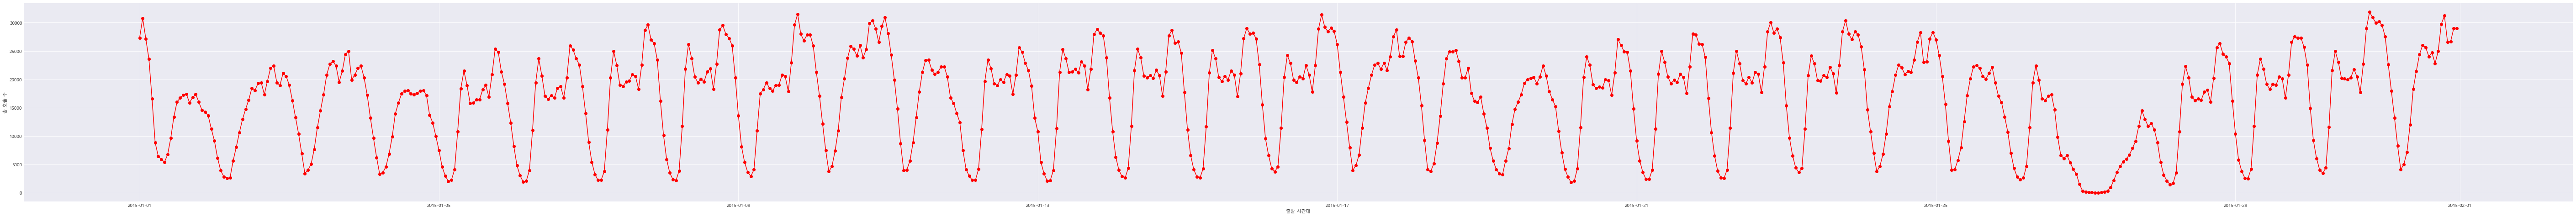

In [10]:
plt.figure(figsize=(100,8))
plt.plot(grouped.cnt.sum(), marker = 'o', c = 'r') 
plt.xlabel('출발 시간대')
plt.ylabel('총 호출 수')
plt.show()  # 1월 27일 새벽 시간대에 유독 콜 수가 적었던 것을 알 수 있다

In [11]:
# day와 hour column으로도 해봤습니다
grouped2 = df.groupby(['day','hour'])
print(grouped2)

In [12]:
total_cnt2 = grouped2.cnt.sum()
print(total_cnt2)

day  hour
1    0       27278
     1       30754
     2       27144
     3       23580
     4       16542
             ...  
31   19      31211
     20      26592
     21      26673
     22      29013
     23      29026
Name: cnt, Length: 744, dtype: int64


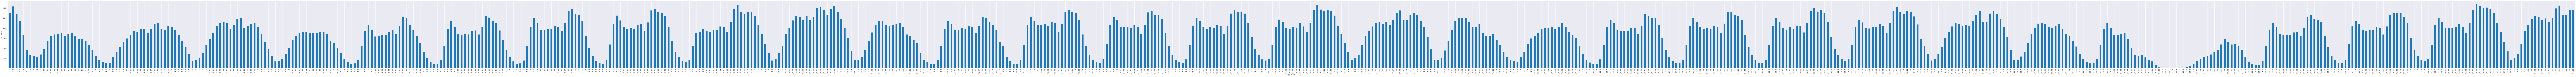

In [13]:
plt.figure(figsize=(300,8))
grouped2.cnt.sum().plot(kind='bar')
plt.xlabel('출발 시간대')
plt.ylabel('총 호출 수')
plt.show()  # 새벽 3,4시가 가장 적은 콜 수, 27일은 0시 이후부터 새벽 내내 거의 콜 수가 없음

### 이유는 정훈님이 보내주신 https://en.wikipedia.org/wiki/January_2015_North_American_blizzard#Mid-Atlantic_states

In [14]:
# 시간별 추이
grouped3 = df.groupby(['hour'])
print(grouped)

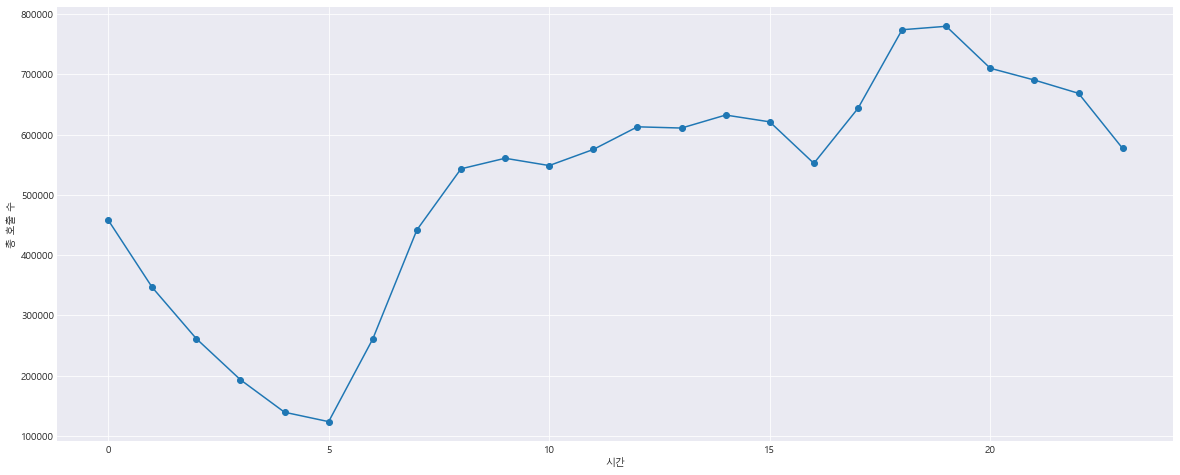

In [15]:
plt.figure(figsize=(20,8))
grouped3.cnt.sum().plot(kind='line', style='-o')
plt.xlabel('시간')
plt.ylabel('총 호출 수')
plt.show() # 새벽에 감소해 5시에 최저 피크를 찍고, 출근 시간대 증가하며, 퇴근시간대인 17시 이후에 확 증가합니다

In [16]:
# 요일별 추이
grouped4 = df.groupby(['weekday'])
print(grouped4)

In [17]:
total_cnt4 = grouped4.cnt.sum()
print(total_cnt4)

weekday
0    1288979
1    1326596
2    1626512
3    2094733
4    2150497
5    2301470
6    1533513
Name: cnt, dtype: int64


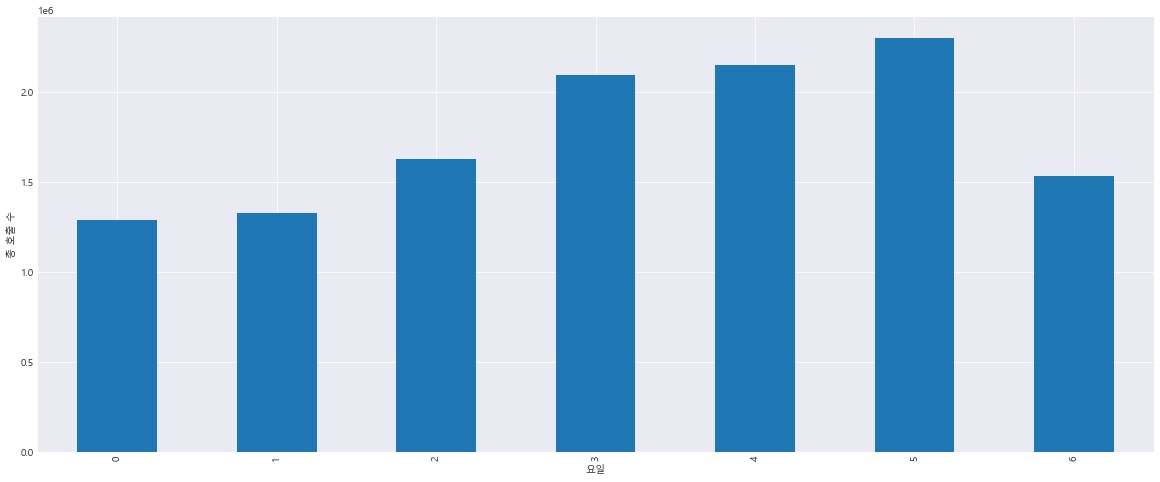

In [18]:
plt.figure(figsize=(20,8))
grouped4.cnt.sum().plot(kind='bar')
plt.xlabel('요일')
plt.ylabel('총 호출 수')
plt.show() # 목,금,토요일에 콜 수가 많네요

<Figure size 2880x576 with 0 Axes>

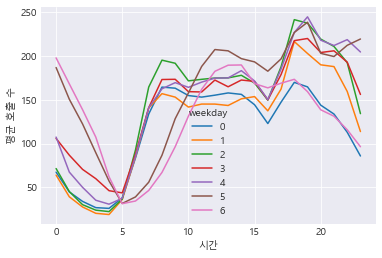

In [19]:
# 시간과 요일별 추이
grouped5 = df.groupby(['hour','weekday'])
plt.figure(figsize=(40,8))
grouped5.cnt.mean().unstack().plot(kind='line')  # 요일별 평균이 합계보다 비교가 더 좋을 것 같습니다
plt.xlabel('시간')
plt.ylabel('평균 호출 수')
plt.show()   # 콜 수가 새벽시간은 주말이 많고, 오전 시간에는 평일이 많습니다. 20시 이후에는 대부분 감소하지만 금,토가 더 많고 토요일은 심지어 살짝 증가합니다

<Figure size 2880x576 with 0 Axes>

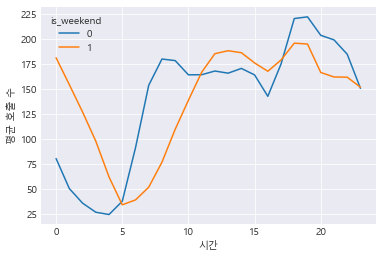

In [20]:
# 평일과 주말 차이
grouped6 = df.groupby(['hour','is_weekend'])
plt.figure(figsize=(40,8))
grouped6.cnt.mean().unstack().plot(kind='line')  # 요일별 평균이 비교가 더 좋을 것 같습니다
plt.xlabel('시간')
plt.ylabel('평균 호출 수')
plt.show() # 주말로 생각했을 때, 새벽의 콜 수가 더 많은 것 같습니다. 늦게까지 놀아서 그런 것일까요?

In [58]:
# 우변번호 별 상위 10개
top_list = df['zip_code'].value_counts().nlargest(10).index
df_top = df[df['zip_code'].isin(top_list)]

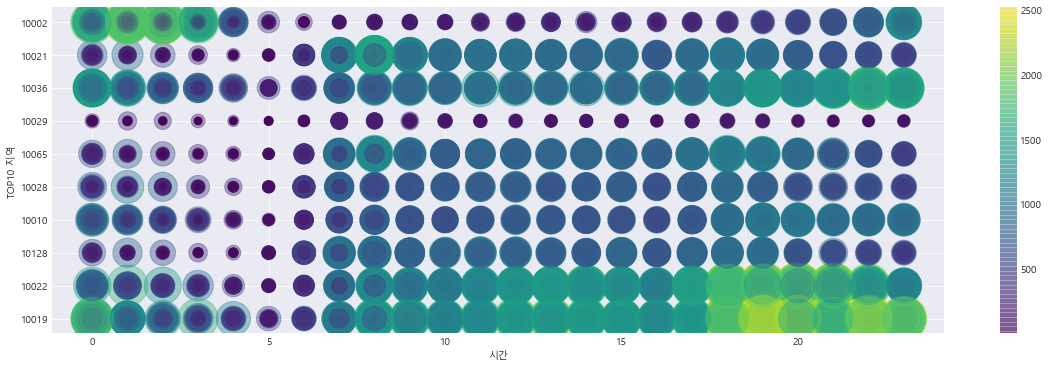

In [59]:
plt.figure(figsize=(20,6))
plt.scatter(df_top['hour'],
           df_top['zip_code'],
           c=df_top['cnt'],
           s=df_top['cnt'],
           alpha=0.4,
           cmap='viridis')
plt.colorbar()
plt.xlabel('시간')
plt.ylabel('TOP10 지역')
plt.show()    # 10002 주소는 다른 지역들 보다 새벽 콜 수가 많습니다.
              # 10022와 10019 지역은 저녁, 밤 시간대 콜 수가 많습니다.
              # 이 지역의 거주자 혹은 방문자는 택시를 많이 사용함을 알 수 있습니다.

In [60]:
# 이제 지도를 활용해서 직관적으로 파악해봅니다
!{sys.executable} -m pip install folium
import folium

In [61]:
def generateBaseMap(default_location=[40.86156, -73.8448], #google map에 들어가서 원하는 위치를 찍으면 location 좌표를 찾을 수 있어요
                    default_zoom_start=11): #location과 시작 확대 정도를 파라미터로 받는 함수를 만들었어요
    base_map = folium.Map(location=default_location, control_scale=True, zoom_start=default_zoom_start)
    return base_map

In [62]:
base_map = generateBaseMap()

In [63]:
# 위도, 경도를 groupby한 후 위에서 만든 캔버스에 히트맵 적용(add_to)
from folium.plugins import HeatMap
HeatMap(data=df[['lat', 'lon']].drop_duplicates().reset_index(drop=True)
, radius=8, max_zoom=11).add_to(base_map)

In [64]:
base_map # 골고루 퍼져있긴하지만, 특히 맨해튼 지역에 콜이 많음을 알 수 있습니다

In [65]:
place_unique=df[['zip_code','lat', 'lon']].drop_duplicates()
TOP_10=place_unique[place_unique['zip_code'].isin(top_list)]

In [67]:
TOP_10

,zip_code,lat,lon
8,10019,40.763992,-73.985893
18,10022,40.758279,-73.967885
19,10128,40.781741,-73.951147
21,10010,40.739885,-73.985222
39,10028,40.776539,-73.953739
53,10065,40.766073,-73.964662
75,10029,40.792048,-73.944442
78,10036,40.759498,-73.989216
124,10021,40.770235,-73.959715
140,10002,40.717057,-73.989329


In [68]:
data=TOP_10
#지도에 좌표(marker) 찍기
for i in range(0,len(data)): 
    folium.Marker([data.iloc[i]['lat'], data.iloc[i]['lon']],
                  popup=data.iloc[i]['zip_code']).add_to(base_map)

In [69]:
base_map        # 상위 10개중 8 지역이 맨해튼의 3rd Avenue의 좌우에 위치해 있습니다.

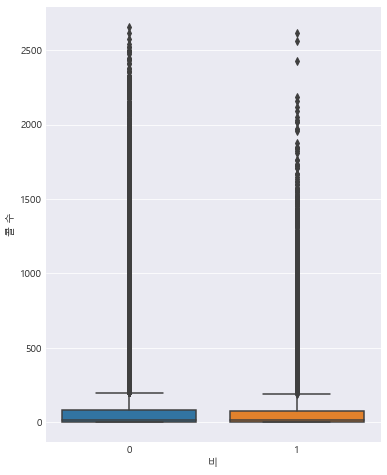

In [32]:
# 날씨에 따라 콜 수에 차이가 있을 것 같습니다. 특히 비와 눈이 올때 증가할 것 같습니다.
# 날씨들 과 cnt 간의 관계
plt.figure(figsize=(6,8))
box=sns.boxplot(x='is_raining',y='cnt',data=df)

box.set_xlabel("비")
box.set_ylabel("콜 수")
plt.show()

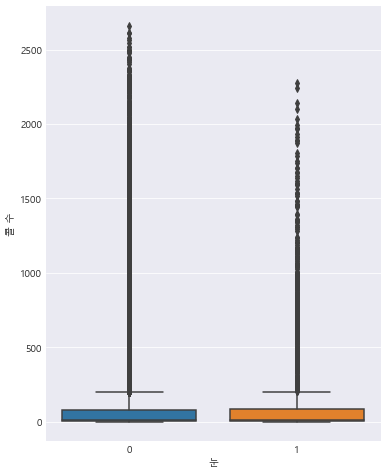

In [33]:
plt.figure(figsize=(6,8))
box=sns.boxplot(x='is_snowing',y='cnt',data=df)

box.set_xlabel("눈")
box.set_ylabel("콜 수")
plt.show()

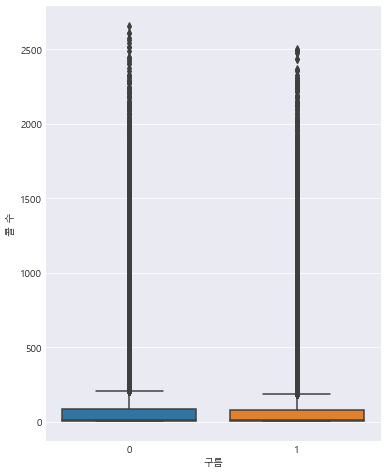

In [34]:
plt.figure(figsize=(6,8))
box=sns.boxplot(x='is_cloudy',y='cnt',data=df)

box.set_xlabel("구름")
box.set_ylabel("콜 수")
plt.show()

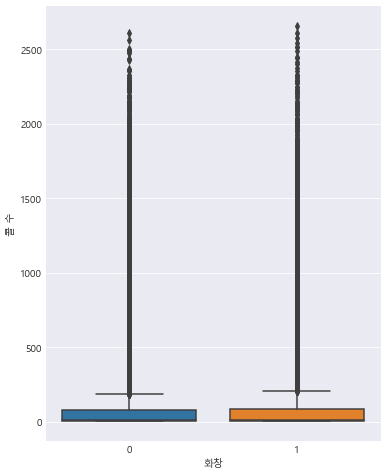

In [35]:
plt.figure(figsize=(6,8))
box=sns.boxplot(x='is_clear',y='cnt',data=df)

box.set_xlabel("화창")
box.set_ylabel("콜 수")
plt.show()               # 날씨와 호출 수에는 유의미한 관계를 찾지 못했습니다.
                         # 이상치들이 굉장히 많습니다.

# 목적과 활용방안까지 구체적으로 제안해보는 EDA

### 전체 EDA 중 최소 1가지 이상 부탁드립니다! 


1) 어떤 기업의 구체적인 상황이나 니즈에 과몰입 해봅시다! 
- 주체가 꼭 기업이 아니어도 된다! 
- Ex) 모빌리티 플랫폼에겐 운전기사도 주요 파트너 고객, 운전기사에게 컨설팅을 해준다면? 
	혹은, 정부기관을 설득하기 위해, 데이터로 어떤 사회문제를 해결할 수 있음을 어필한다면?
 
2) 주어진 데이터에 한정되지 말고, 더 넓은 범위의 활용가능성을 생각해보세요! 
- ~에 대한 데이터가 더 있다면, ~를 해볼 수 있을 것이다. 
- 데이터 분석에 더불어, 자료조사를 통해 논리를 완성해도 됨, ex) 통계청, 산업 보고서에 따르면 


#### $*$ 시간과 요일별 추이를 종합해보면 [금=>토] 와 [토=>일] 은 다른 요일들에 비해서 밤부터 새벽까지 콜 수가 많습니다. 오히려 20시 이후에 증가하는 경향까지 보입니다. 주말이기때문에 늦게까지 놀 수 있어서 이런 결과가 나온 것같습니다. 그러므로 운전기사분들에게 위의 두 요일의 시간대에는 번화가를, 특히 맨해튼을 중심으로 활동을 활발히 하시는 것을 제안드릴 수 있을 것 같습니다.

#### $*$ 지도에 top10 주소를 찍은 결과 3rd Avenue 주변에서 가장 많은 호출 수를 기록하였습니3rd Avenue이 맨해튼의 중심인 미드타운이기는 하지만, 핵심 관광지들은 5th Avenue에 위치해 있습니다. 그래서 처음에는 택시가 들어가기 힘들어서 조금 걸어나와서 택시를 잡는 경우를 생각해보았습니다. (https://jhdyys.tistory.com/1603) 

#### $*$ 그러나 3rd Avenue가 위치한 Upper East Side가 뉴욕에서 가장 부유한 지역이라는 사실을 알게되었습니다. 경제적인 여유가 되기 때문에 택시 콜이 자주 일어난다고 유추함이 더욱 타당해보입니다. 택시기사 분들에게 Upper East Side 부근에 많이 분포하도록 해야 수요를 맞출 수 있습니다. (https://www.korinytimes.com/archives/10705)

In [70]:
!pip install IPython

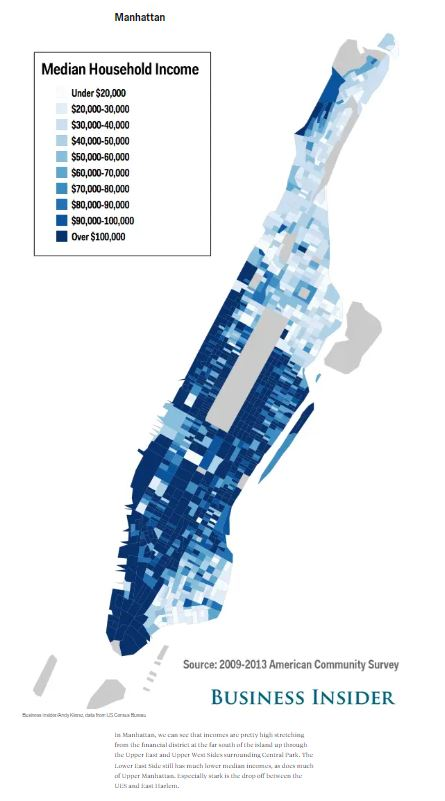

In [71]:
from IPython.display import Image
Image("manhattan.jpg")

#### $*$ dropoff time, dropoff latitude/longitude 데이터가 있으면, 승차와 하차 시간의 차이를 구해서 장거리/단거리 고객이 어느 지역에서 어느 시간대에 타는지를 알 수 있을 것 같습니다. (공항이나 도심지에서 떨어진 놀이공원 같은 곳)

#### $*$ 출퇴근 시간대에 콜 수가 많은 지역은 교통체증이 심할 것입니다. 고로 정부에게 그 지역의 도로를 넒히거나, 대중교통 배차를 늘리는 방향을 건의할 수 있을 것 같습니다.

# 데이터 전처리

### 모델링을 위한 기본 전처리
  - `기본 정보 확인 (결측치 및 이상치 처리)`
      - df.info()
      - df.describe()
      - 간단한 시각화 
  - `시간 관련 전처리 (새로운 열 생성)` 
      - DATETIME에서 MONTH, HOUR, WEEKDAY 등 추출
  - `Categorical 데이터 전처리`
      - One Hot Encoding
      - Label Encoding
  - `Train / Test Split`
    - NY taxi data에서 주의점 

In [72]:
df['weekday_sin']=np.sin(2*np.pi*df.weekday/7) # weekday와 hour는 cyclical하기 때문에 그 특성을 반영해줘야합니다.
df['weekday_cos']=np.cos(2*np.pi*df.weekday/7)
df['hour_sin']=np.sin(2*np.pi*df.hour/24)
df['hour_cos']=np.cos(2*np.pi*df.hour/24)

### https://ianlondon.github.io/blog/encoding-cyclical-features-24hour-time/

In [73]:
df.head()

,zip_code,pickup_hour,month,day,weekday,hour,is_weekend,cnt,lat,lon,...,wind_y,is_raining,is_snowing,is_cloudy,is_clear,weather_strength,weekday_sin,weekday_cos,hour_sin,hour_cos
0,11106,2015-01-01,1,1,3,0,1,75,40.761229,-73.929593,...,-0.93358,0,0,0,1,0,0.433884,-0.900969,0.0,1.0
1,10006,2015-01-01,1,1,3,0,1,64,40.708312,-74.013440,...,-0.93358,0,0,0,1,0,0.433884,-0.900969,0.0,1.0
2,11201,2015-01-01,1,1,3,0,1,169,40.692500,-73.991763,...,-0.93358,0,0,0,1,0,0.433884,-0.900969,0.0,1.0
3,11430,2015-01-01,1,1,3,0,1,222,40.653199,-73.784133,...,-0.93358,0,0,0,1,0,0.433884,-0.900969,0.0,1.0
4,10032,2015-01-01,1,1,3,0,1,64,40.837391,-73.941015,...,-0.93358,0,0,0,1,0,0.433884,-0.900969,0.0,1.0


### Train and Test Split
- 시계열 데이터는 Random Sampling을 하면 안됨
- Train엔 과거 데이터, Test엔 (과거 대비) 미래 데이터가 있어야 함
    - 만약 Train에 미래 데이터가 있다면? 미래를 보고 과거를 예측한 꼴
    - 실제로 사용할 땐 과거 데이터 기반으로 미래 데이터를 예측

In [74]:
def split_train_and_test(df, date):
    """
    Dataframe에서 train_df, test_df로 나눠주는 함수
    
    df : 시계열 데이터 프레임
    date : 기준점 날짜
    """
    train_df = df[df['pickup_hour'] < date]
    test_df = df[df['pickup_hour'] >= date]
    return train_df, test_df

# dataset이 1월에 한정되어있기 때문에, 날짜보다는 다른 feature들이 cnt에 유의미한 영향을 줄 것이라 판단해서 시계열 데이터로 split하지 않음

In [75]:
from sklearn.model_selection import train_test_split

# x에 zip_code, month, hour feature 제외
# 앞선 EDA에서 날씨와 cnt의 관계는 크게 발견하지 못했지만 일단 포함해서 모델링해봅니다
x=df[[ 'weekday_sin', 'weekday_cos', 'hour_sin', 'hour_cos', 'is_weekend', 'lat', 'lon', 'temp', 'is_raining', 'is_snowing', 'is_cloudy', 'is_clear', 'weather_strength']]
y=df['cnt']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

In [76]:
import random
random_seed = 777

### DecisionTreeRegressor

In [77]:
# 단순히 한 번만 진행해보기 (과적합 우려)
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor(max_depth=10,criterion='mae', splitter ='best')

reg.fit(x_train,y_train)

DecisionTreeRegressor(criterion='mae', max_depth=10)

In [78]:
from sklearn.metrics import mean_absolute_error # 모델 성능평가는 mae로 
# 예측하기
prediction_reg = reg.predict(x_test)
prediction_reg_train = reg.predict(x_train)

# 채점
mae_reg = mean_absolute_error(y_test, prediction_reg)
mae_reg_train = mean_absolute_error(y_train, prediction_reg_train)

# 성적 발표
print(f'Mean absoulte error: {mae_reg}')
print(f'Mean train absolute error: {mae_reg_train}')   # MAE는 약 33.94

Mean absoulte error: 33.9386922546541
Mean train absolute error: 32.7292576419214


In [79]:
# kfold 교차검증 실행
from sklearn.model_selection import KFold
fold_reg = DecisionTreeRegressor(max_depth=10, criterion='mae', splitter ='best')
kfold = KFold(n_splits=5) # k=5
cv_mae =[]

In [80]:
n_iter = 0
for train_index, test_index in kfold.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    fold_reg.fit(x_train,y_train)
    pred = fold_reg.predict(x_test)
    n_iter +=1
    
    mae = np.round(mean_absolute_error(y_test, pred),4)
    cv_mae.append(mae)
    print('{}번째 K-fold MAE : {}, 학습데이터 크기 : {}, 검증 데이터 크기: {}'.format(n_iter, mae, x_train.shape[0], y_test.shape[0]))
print('평균 K-fold MAE : {}'.format(np.mean(np.array(cv_mae))))
# 평균 MAE는 약 37.59입니다. 과적합을 피하기 위해 kfold를 진행하였는데 오히려 성능이 떨어졌습니다...

1번째 K-fold MAE : 43.4501, 학습데이터 크기 : 69616, 검증 데이터 크기: 17404
2번째 K-fold MAE : 30.6623, 학습데이터 크기 : 69616, 검증 데이터 크기: 17404
3번째 K-fold MAE : 34.56, 학습데이터 크기 : 69616, 검증 데이터 크기: 17404
4번째 K-fold MAE : 31.3634, 학습데이터 크기 : 69616, 검증 데이터 크기: 17404
5번째 K-fold MAE : 47.9386, 학습데이터 크기 : 69616, 검증 데이터 크기: 17404
평균 K-fold MAE : 37.59488


In [81]:
# GridSearchCV로 하이퍼파라미터 튜닝을 진행하기 보다는 feature extraction을 해보았습니다.
# 앞서 EDA에서 확인했듯이, 날씨 관련 데이터는 큰 연관이 없기에 제거합니다.

new_x=df[[ 'weekday_sin', 'weekday_cos', 'hour_sin', 'hour_cos', 'is_weekend', 'lat', 'lon']]
y=df['cnt']
x_train2, x_test2, y_train2, y_test2 = train_test_split(new_x,y,test_size=0.2)


In [86]:
# 단순히 한 번만 진행해보기 (과적합 우려) 

from sklearn.tree import DecisionTreeRegressor
reg2 = DecisionTreeRegressor(max_depth=10,criterion='mae', splitter ='best')

reg2.fit(x_train2,y_train2)

DecisionTreeRegressor(criterion='mae', max_depth=10)

In [87]:
from sklearn.metrics import mean_absolute_error # 모델 성능평가는 mae로 
# 예측하기
prediction_reg2 = reg2.predict(x_test2)
prediction_reg_train2 = reg2.predict(x_train2)

# 채점
mae_reg2 = mean_absolute_error(y_test2, prediction_reg2)
mae_reg_train2 = mean_absolute_error(y_train2, prediction_reg_train2)

# 성적 발표
print(f'Mean absoulte error: {mae_reg2}')
print(f'Mean train absolute error: {mae_reg_train2}')   # MAE는 약 34.85로 증가하였습니다..

Mean absoulte error: 34.85000574580556
Mean train absolute error: 32.9786830613652


In [88]:
# kfold 교차검증 실행
from sklearn.model_selection import KFold
fold_reg2 = DecisionTreeRegressor(max_depth=10, criterion='mae', splitter ='best')
kfold = KFold(n_splits=5) # k=5
cv_mae =[]

In [89]:
n_iter = 0
for train_index, test_index in kfold.split(new_x):
    x_train2, x_test2 = new_x.iloc[train_index], new_x.iloc[test_index]
    y_train2, y_test2 = y.iloc[train_index], y.iloc[test_index]
    
    fold_reg2.fit(x_train2,y_train2)
    pred2 = fold_reg2.predict(x_test2)
    n_iter +=1
    
    mae = np.round(mean_absolute_error(y_test2, pred2),4)
    cv_mae.append(mae)
    print('{}번째 K-fold MAE : {}, 학습데이터 크기 : {}, 검증 데이터 크기: {}'.format(n_iter, mae, x_train.shape[0], y_test.shape[0]))
print('평균 K-fold MAE : {}'.format(np.mean(np.array(cv_mae))))
# 평균 MAE는 약 36.70입니다. 과적합을 피하기 위해 kfold를 진행하였는데 오히려 성능이 떨어졌습니다...

1번째 K-fold MAE : 42.8088, 학습데이터 크기 : 69616, 검증 데이터 크기: 17404
2번째 K-fold MAE : 29.4303, 학습데이터 크기 : 69616, 검증 데이터 크기: 17404
3번째 K-fold MAE : 33.7615, 학습데이터 크기 : 69616, 검증 데이터 크기: 17404
4번째 K-fold MAE : 29.8662, 학습데이터 크기 : 69616, 검증 데이터 크기: 17404
5번째 K-fold MAE : 47.6551, 학습데이터 크기 : 69616, 검증 데이터 크기: 17404
평균 K-fold MAE : 36.70438


#### XGBoostRegressor

In [90]:
!pip install xgboost

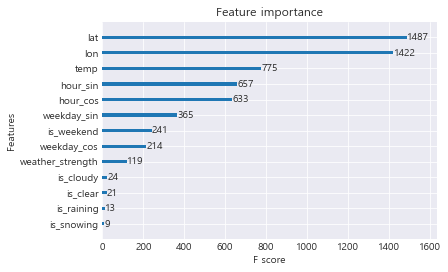

In [91]:
# 단순 진행
from xgboost import XGBRegressor
from xgboost import plot_importance
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2)

xgb = XGBRegressor()
xgb.fit(x_train,y_train)
import matplotlib.pyplot as plt
plot_importance(xgb)
plt.show()

In [92]:
### 학습된 모델로 분류 예측
pred = xgb.predict(x_test)
pred_train = xgb.predict(x_train)

### 채점
mae_xgb = mean_absolute_error(y_test, pred)
mae_xgb_train = mean_absolute_error(y_train, pred_train)

### 성적 발표
print(f'Mean absoulte error: {mae_xgb}')
print(f'Mean train absolute error: {mae_xgb_train}')   # MAE 값이 약 33.88

Mean absoulte error: 33.88429800472478
Mean train absolute error: 30.283302770245378


In [93]:
kfold = KFold(n_splits=5)  # KFold 진행
cv_mae =[]

In [94]:
n_iter = 0
for train_index, test_index in kfold.split(x):
    x_train, x_test = x.iloc[train_index], x.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    xgb.fit(x_train,y_train)
    pred = xgb.predict(x_test)
    n_iter +=1
    
    mae = np.round(mean_absolute_error(y_test, pred),4)
    cv_mae.append(mae)
    print('{}번째 K-fold MAE : {}, 학습데이터 크기 : {}, 검증 데이터 크기: {}'.format(n_iter, mae, x_train.shape[0], y_test.shape[0]))

print('MAE 목록: {}'.format(np.array(cv_mae)))
print('평균 MAE: {}'.format(np.mean(np.array(cv_mae))))   #하이퍼파라미터 튜닝 필요할듯

1번째 K-fold MAE : 55.5017, 학습데이터 크기 : 69616, 검증 데이터 크기: 17404
2번째 K-fold MAE : 37.767, 학습데이터 크기 : 69616, 검증 데이터 크기: 17404
3번째 K-fold MAE : 39.2477, 학습데이터 크기 : 69616, 검증 데이터 크기: 17404
4번째 K-fold MAE : 36.7263, 학습데이터 크기 : 69616, 검증 데이터 크기: 17404
5번째 K-fold MAE : 54.3869, 학습데이터 크기 : 69616, 검증 데이터 크기: 17404
MAE 목록: [55.5017 37.767  39.2477 36.7263 54.3869]
평균 MAE: 44.72592


In [97]:
# feature extraction
new_x=df[[ 'weekday_sin', 'weekday_cos', 'hour_sin', 'hour_cos', 'is_weekend', 'lat', 'lon']]
y=df['cnt']
x_train2, x_test2, y_train2, y_test2 = train_test_split(new_x,y,test_size=0.2)

In [98]:
xgb = XGBRegressor()
xgb.fit(x_train2,y_train2)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [99]:
### 학습된 모델로 분류 예측
pred2 = xgb.predict(x_test2)
pred_train2 = xgb.predict(x_train2)

### 채점
mae_xgb2 = mean_absolute_error(y_test2, pred2)
mae_xgb2_train = mean_absolute_error(y_train2, pred_train2)

### 성적 발표
print(f'Mean absoulte error: {mae_xgb2}')
print(f'Mean train absolute error: {mae_xgb2_train}')   # MAE가 약 33.28로 조금 감소

Mean absoulte error: 33.27944427993635
Mean train absolute error: 30.635092022188935


In [100]:
kfold = KFold(n_splits=5)  # KFold 진행
cv_mae =[]

In [101]:
n_iter = 0
for train_index, test_index in kfold.split(new_x):
    x_train2, x_test2 = new_x.iloc[train_index], new_x.iloc[test_index]
    y_train2, y_test2 = y.iloc[train_index], y.iloc[test_index]
    
    xgb.fit(x_train2,y_train2)
    pred2 = xgb.predict(x_test2)
    n_iter +=1
    
    mae = np.round(mean_absolute_error(y_test2, pred2),4)
    cv_mae.append(mae)
    print('{}번째 K-fold MAE : {}, 학습데이터 크기 : {}, 검증 데이터 크기: {}'.format(n_iter, mae, x_train.shape[0], y_test.shape[0]))

print('MAE 목록: {}'.format(np.array(cv_mae)))
print('평균 MAE: {}'.format(np.mean(np.array(cv_mae)))) # feature가 많을때의 KFold MAE 보다는 감소 

1번째 K-fold MAE : 50.2338, 학습데이터 크기 : 69616, 검증 데이터 크기: 17404
2번째 K-fold MAE : 30.3999, 학습데이터 크기 : 69616, 검증 데이터 크기: 17404
3번째 K-fold MAE : 33.9891, 학습데이터 크기 : 69616, 검증 데이터 크기: 17404
4번째 K-fold MAE : 31.1142, 학습데이터 크기 : 69616, 검증 데이터 크기: 17404
5번째 K-fold MAE : 46.6185, 학습데이터 크기 : 69616, 검증 데이터 크기: 17404
MAE 목록: [50.2338 30.3999 33.9891 31.1142 46.6185]
평균 MAE: 38.4711
